In [2]:
## load initial packages
import pandas as pd
import geopandas as gpd
import numpy as np
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [48]:
## load datasets
hls = pd.read_excel("../data/HLS_data/national_hl_scores.xlsx")
hls.head()

,Census block group ID,Health literacy estimate
0,10010201001,248.91
1,10010201002,248.66
2,10010202001,233.55
3,10010202002,238.55
4,10010203001,247.96


In [49]:
hls['Census block group ID'] = hls['Census block group ID'].astype(str)
hls['Census block group ID'] = hls['Census block group ID'].apply(lambda x: x.zfill(12) if len(x) == 11 else x)
hls.info

<bound method DataFrame.info of        Census block group ID  Health literacy estimate
0               010010201001                    248.91
1               010010201002                    248.66
2               010010202001                    233.55
3               010010202002                    238.55
4               010010203001                    247.96
...                      ...                       ...
216859          560459511001                    249.46
216860          560459511002                    248.95
216861          560459513001                    248.07
216862          560459513002                    246.20
216863          560459513003                    253.89

[216864 rows x 2 columns]>

In [66]:
import urllib.request
from bs4 import BeautifulSoup

base_url = "https://www2.census.gov/geo/tiger/TIGER2022/BG/"

# Retrieve the HTML content of the directory page
html_content = urllib.request.urlopen(base_url).read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find all the <a> tags (hyperlinks) in the HTML
links = soup.find_all('a')

for link in links:
    href = link.get('href')
    if href is not None and href.endswith(".zip"):
        file_url = base_url + href
        file_name = href.rsplit('/', 1)[-1]
        save_path = "../data/HLS_data" + file_name

        urllib.request.urlretrieve(file_url, save_path)
        print(f"Downloaded: {file_name}")

print("All files downloaded successfully.")

('../data/HLS_datatl_2022_01_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc970>)

Downloaded: tl_2022_01_bg.zip


('../data/HLS_datatl_2022_02_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9a0>)

Downloaded: tl_2022_02_bg.zip


('../data/HLS_datatl_2022_04_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca90>)

Downloaded: tl_2022_04_bg.zip


('../data/HLS_datatl_2022_05_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc8e0>)

Downloaded: tl_2022_05_bg.zip


('../data/HLS_datatl_2022_06_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfcb20>)

Downloaded: tl_2022_06_bg.zip


('../data/HLS_datatl_2022_08_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc820>)

Downloaded: tl_2022_08_bg.zip


('../data/HLS_datatl_2022_09_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc670>)

Downloaded: tl_2022_09_bg.zip


('../data/HLS_datatl_2022_10_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9d0>)

Downloaded: tl_2022_10_bg.zip


('../data/HLS_datatl_2022_11_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc910>)

Downloaded: tl_2022_11_bg.zip


('../data/HLS_datatl_2022_12_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc970>)

Downloaded: tl_2022_12_bg.zip


('../data/HLS_datatl_2022_13_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc8e0>)

Downloaded: tl_2022_13_bg.zip


('../data/HLS_datatl_2022_15_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca30>)

Downloaded: tl_2022_15_bg.zip


('../data/HLS_datatl_2022_16_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9a0>)

Downloaded: tl_2022_16_bg.zip


('../data/HLS_datatl_2022_17_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc8b0>)

Downloaded: tl_2022_17_bg.zip


('../data/HLS_datatl_2022_18_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca60>)

Downloaded: tl_2022_18_bg.zip


('../data/HLS_datatl_2022_19_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc670>)

Downloaded: tl_2022_19_bg.zip


('../data/HLS_datatl_2022_20_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9d0>)

Downloaded: tl_2022_20_bg.zip


('../data/HLS_datatl_2022_21_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc910>)

Downloaded: tl_2022_21_bg.zip


('../data/HLS_datatl_2022_22_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfcb20>)

Downloaded: tl_2022_22_bg.zip


('../data/HLS_datatl_2022_23_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc8e0>)

Downloaded: tl_2022_23_bg.zip


('../data/HLS_datatl_2022_24_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca30>)

Downloaded: tl_2022_24_bg.zip


('../data/HLS_datatl_2022_25_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9a0>)

Downloaded: tl_2022_25_bg.zip


('../data/HLS_datatl_2022_26_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc8b0>)

Downloaded: tl_2022_26_bg.zip


('../data/HLS_datatl_2022_27_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca60>)

Downloaded: tl_2022_27_bg.zip


('../data/HLS_datatl_2022_28_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc670>)

Downloaded: tl_2022_28_bg.zip


('../data/HLS_datatl_2022_29_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9d0>)

Downloaded: tl_2022_29_bg.zip


('../data/HLS_datatl_2022_30_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc910>)

Downloaded: tl_2022_30_bg.zip


('../data/HLS_datatl_2022_31_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfcb20>)

Downloaded: tl_2022_31_bg.zip


('../data/HLS_datatl_2022_32_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9a0>)

Downloaded: tl_2022_32_bg.zip


('../data/HLS_datatl_2022_33_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc8b0>)

Downloaded: tl_2022_33_bg.zip


('../data/HLS_datatl_2022_34_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc760>)

Downloaded: tl_2022_34_bg.zip


('../data/HLS_datatl_2022_35_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca30>)

Downloaded: tl_2022_35_bg.zip


('../data/HLS_datatl_2022_36_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9d0>)

Downloaded: tl_2022_36_bg.zip


('../data/HLS_datatl_2022_37_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc910>)

Downloaded: tl_2022_37_bg.zip


('../data/HLS_datatl_2022_38_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc760>)

Downloaded: tl_2022_38_bg.zip


('../data/HLS_datatl_2022_39_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9a0>)

Downloaded: tl_2022_39_bg.zip


('../data/HLS_datatl_2022_40_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca60>)

Downloaded: tl_2022_40_bg.zip


('../data/HLS_datatl_2022_41_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfcb20>)

Downloaded: tl_2022_41_bg.zip


('../data/HLS_datatl_2022_42_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc8b0>)

Downloaded: tl_2022_42_bg.zip


('../data/HLS_datatl_2022_44_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc820>)

Downloaded: tl_2022_44_bg.zip


('../data/HLS_datatl_2022_45_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca30>)

Downloaded: tl_2022_45_bg.zip


('../data/HLS_datatl_2022_46_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9a0>)

Downloaded: tl_2022_46_bg.zip


('../data/HLS_datatl_2022_47_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc910>)

Downloaded: tl_2022_47_bg.zip


('../data/HLS_datatl_2022_48_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc760>)

Downloaded: tl_2022_48_bg.zip


('../data/HLS_datatl_2022_49_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9d0>)

Downloaded: tl_2022_49_bg.zip


('../data/HLS_datatl_2022_50_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca60>)

Downloaded: tl_2022_50_bg.zip


('../data/HLS_datatl_2022_51_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc9a0>)

Downloaded: tl_2022_51_bg.zip


('../data/HLS_datatl_2022_53_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc8b0>)

Downloaded: tl_2022_53_bg.zip


('../data/HLS_datatl_2022_54_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca30>)

Downloaded: tl_2022_54_bg.zip


('../data/HLS_datatl_2022_55_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc820>)

Downloaded: tl_2022_55_bg.zip


('../data/HLS_datatl_2022_56_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc760>)

Downloaded: tl_2022_56_bg.zip


('../data/HLS_datatl_2022_60_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfcb20>)

Downloaded: tl_2022_60_bg.zip


('../data/HLS_datatl_2022_66_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc970>)

Downloaded: tl_2022_66_bg.zip


('../data/HLS_datatl_2022_69_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfca60>)

Downloaded: tl_2022_69_bg.zip


('../data/HLS_datatl_2022_72_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfc910>)

Downloaded: tl_2022_72_bg.zip


('../data/HLS_datatl_2022_78_bg.zip',
 <http.client.HTTPMessage at 0x7f8899cfcb20>)

Downloaded: tl_2022_78_bg.zip
All files downloaded successfully.


In [68]:
import os
import zipfile

directory = "../data/HLS_data"  # Replace with the directory containing the zip files

# Iterate over all files in the directory
for file_name in os.listdir(directory):
    if file_name.endswith(".zip"):
        file_path = os.path.join(directory, file_name)

        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(directory)

        print(f"Unzipped: {file_name}")

print("All zip files extracted successfully.")


Unzipped: HLS_datatl_2022_10_bg.zip
Unzipped: HLS_datatl_2022_02_bg.zip
Unzipped: HLS_datatl_2022_34_bg.zip
Unzipped: HLS_datatl_2022_49_bg.zip
Unzipped: HLS_datatl_2022_38_bg.zip
Unzipped: HLS_datatl_2022_45_bg.zip
Unzipped: HLS_datatl_2022_26_bg.zip
Unzipped: HLS_datatl_2022_12_bg.zip
Unzipped: HLS_datatl_2022_24_bg.zip
Unzipped: HLS_datatl_2022_47_bg.zip
Unzipped: HLS_datatl_2022_36_bg.zip
Unzipped: HLS_datatl_2022_28_bg.zip
Unzipped: HLS_datatl_2022_55_bg.zip
Unzipped: HLS_datatl_2022_32_bg.zip
Unzipped: HLS_datatl_2022_51_bg.zip
Unzipped: HLS_datatl_2022_20_bg.zip
Unzipped: HLS_datatl_2022_16_bg.zip
Unzipped: HLS_datatl_2022_08_bg.zip
Unzipped: HLS_datatl_2022_04_bg.zip
Unzipped: HLS_datatl_2022_41_bg.zip
Unzipped: HLS_datatl_2022_22_bg.zip
Unzipped: HLS_datatl_2022_53_bg.zip
Unzipped: HLS_datatl_2022_30_bg.zip
Unzipped: HLS_datatl_2022_18_bg.zip
Unzipped: HLS_datatl_2022_06_bg.zip
Unzipped: HLS_datatl_2022_69_bg.zip
Unzipped: HLS_datatl_2022_48_bg.zip
Unzipped: HLS_datatl_2022_35

In [47]:
# directory = "../data/HLS_data"  # Replace with the directory containing the extracted files

# # Iterate over all files in the directory
# for file_name in os.listdir(directory):
#     file_path = os.path.join(directory, file_name)

#     if file_name.endswith(".shp"):
#         # Keep .shp file, do nothing
#         pass
#     else:
#         # Delete the file if it's not a .shp file
#         os.remove(file_path)
#         print(f"Deleted: {file_name}")

# print("Cleanup completed.")


Deleted: tl_2022_10_bg.cpg
Deleted: tl_2022_09_bg.shp.ea.iso.xml
Deleted: tl_2022_47_bg.shp.ea.iso.xml
Deleted: tl_2022_21_bg.shp.ea.iso.xml
Deleted: tl_2022_56_bg.shp.iso.xml
Deleted: tl_2022_34_bg.cpg
Deleted: tl_2022_49_bg.cpg
Deleted: tl_2022_32_bg.shp.iso.xml
Deleted: tl_2022_27_bg.shp.iso.xml
Deleted: tl_2022_15_bg.shp.ea.iso.xml
Deleted: tl_2022_26_bg.cpg
Deleted: tl_2022_38_bg.cpg
Deleted: tl_2022_45_bg.cpg
Deleted: tl_2022_42_bg.shp.ea.iso.xml
Deleted: tl_2022_48_bg.prj
Deleted: tl_2022_28_bg.shp.iso.xml
Deleted: tl_2022_06_bg.dbf
Deleted: tl_2022_35_bg.prj
Deleted: HLS_datatl_2022_10_bg.zip
Deleted: tl_2022_18_bg.dbf
Deleted: tl_2022_10_bg.shx
Deleted: tl_2022_56_bg.prj
Deleted: tl_2022_27_bg.prj
Deleted: tl_2022_69_bg.dbf
Deleted: tl_2022_24_bg.shp.ea.iso.xml
Deleted: tl_2022_44_bg.prj
Deleted: tl_2022_39_bg.prj
Deleted: tl_2022_22_bg.dbf
Deleted: tl_2022_38_bg.shp.ea.iso.xml
Deleted: tl_2022_11_bg.prj
Deleted: tl_2022_72_bg.prj
Deleted: tl_2022_34_bg.shx
Deleted: HLS_datatl

In [65]:
# import os
# import shapefile

# directory = "../data/HLS_data"  # Replace with the directory containing the .shp files

# # Iterate over all files in the directory
# for file_name in os.listdir(directory):
#     if file_name.endswith(".shp"):
#         shapefile_path = os.path.join(directory, file_name)

#         # Restore the .shx file
#         shapefile.fix_index(shapefile_path)

# print("All .shx files restored.")



AttributeError: module 'shapefile' has no attribute 'fix_index'

In [69]:
# us_map1 = gpd.read_file("../tl_2022_01_bg/tl_2022_01_bg.shp")
# us_map1.head()

directory = "../data/HLS_data"  # Replace with the directory containing the .shp files

# Initialize an empty GeoDataFrame
combined_gdf = gpd.GeoDataFrame()

# Iterate over all files in the directory
for file_name in os.listdir(directory):
    if file_name.endswith(".shp"):
        file_path = os.path.join(directory, file_name)

        # Read the .shp file as a GeoDataFrame
        gdf = gpd.read_file(file_path)

        # Append the GeoDataFrame to the combined GeoDataFrame
        combined_gdf = combined_gdf.append(gdf, ignore_index=True)

print("All .shp files read and combined into one GeoDataFrame.")

/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)
/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

All .shp files read and combined into one GeoDataFrame.


/var/folders/4l/ygb5zg1102qg26s9tsr84m0w0000gn/T/ipykernel_58082/1010026808.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = combined_gdf.append(gdf, ignore_index=True)


In [77]:
merged = pd.merge(combined_gdf, hls, left_on = "GEOID", right_on = "Census block group ID")
merged.sort_values("GEOID").head()

# Check if every cell is filled
is_filled = merged.notnull().values.all()

# Display the result
if is_filled:
    print("Every cell is filled.")
else:
    print("There are missing values in the dataframe.")


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Census block group ID,Health literacy estimate
135069,01,001,020100,1,010010201001,Block Group 1,G5030,S,4264299,28435,+32.4658320,-086.4896607,"POLYGON ((-86.51038 32.47225, -86.51031 32.472...",010010201001,248.91
133042,01,001,020100,2,010010201002,Block Group 2,G5030,S,5561004,0,+32.4858732,-086.4896724,"POLYGON ((-86.50461 32.47723, -86.50453 32.477...",010010201002,248.66
133054,01,001,020200,1,010010202001,Block Group 1,G5030,S,2058374,0,+32.4800823,-086.4749744,"POLYGON ((-86.48127 32.47744, -86.48126 32.477...",010010202001,233.55
133055,01,001,020200,2,010010202002,Block Group 2,G5030,S,1262444,5669,+32.4644350,-086.4697659,"POLYGON ((-86.47611 32.46765, -86.47564 32.467...",010010202002,238.55
133066,01,001,020300,1,010010203001,Block Group 1,G5030,S,3866513,9054,+32.4801750,-086.4607925,"POLYGON ((-86.47087 32.47573, -86.47084 32.475...",010010203001,247.96


Every cell is filled.


(-130.0, -50.0)

(20.0, 50.0)

<AxesSubplot:>

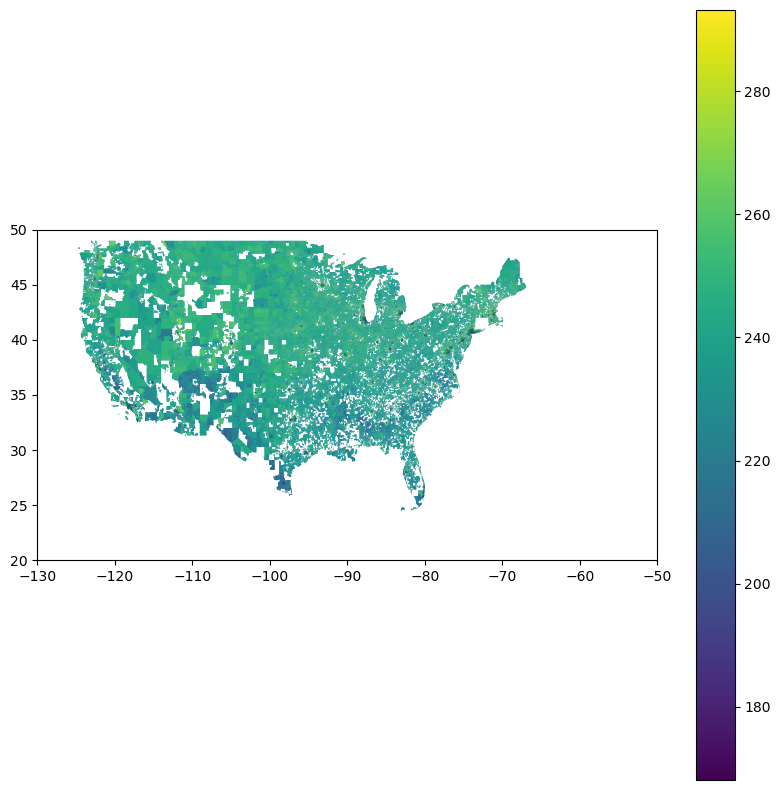

In [84]:
import matplotlib.pyplot as plt
import geopandas as gpd

# geomerged = gpd.GeoDataFrame(merged)
fig, ax = plt.subplots(figsize = (10, 10))
ax = merged.plot(axes=ax)
plt.xlim(-130, -50)
plt.ylim(20, 50)
merged.plot(ax = ax, column = "Health literacy estimate", legend = True)

# us_map.plot(ax = ax, color='lightgrey')
# al_locations.plot(ax = ax)